# Wrangling and Analyze Data

In [1]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## Data Gathering

1. Loading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter_archive_enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Checking for duplicates

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2. Loading the tweet image prediction (image_predictions.tsv)

In [5]:
df2 = pd.read_csv('image_predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


3. Loading the 3rd dataset (tweet_json.txt)

In [8]:
df3_list = []
with open('tweet_json.txt','r') as file:
    for line in file:
     df3_list.append(json.loads(line))
    
    df3=pd.DataFrame(df3_list,columns=['id','retweet_count','favorite_count'])

In [9]:
df3.sample(5)

,id,retweet_count,favorite_count
1553,688894073864884227,792,2462
887,759793422261743616,2173,6620
594,798701998996647937,9126,0
540,806242860592926720,13616,0
2053,671362598324076544,325,1193


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [11]:
df3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Assessing Data

### Quality issues
1. Wrong datatype for timestamp, its an object instead of date 

2. Missing in_reply_to_status_id, in_reply_to_user_id

3. Column rating_numerator and rating_denominator dtype is int instead of float

4. Convert the dog names to lower case for consistency

5. Missing value for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 

6. None instead of NaN

7. Dog names that have none values converted to NaN

8. Change 'tweet_id' dtype to string


### Tidiness issues
1. Change the column title "id" for df3 to match with the df1 and df2

2. Join the 3 datasets by tweet_id

3. Merge 'doggo', 'floofer', 'pupper', 'puppo' columns in to one 'dog_stage'

4. Now that we've merge the above columns, we can drop them

## Cleaning Data

In [12]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1: Wrong datatype for timestamp, its an object instead of date

#### Define: using pd.to_datetime function to convert the 'timestamp' column to date

#### Code

In [13]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean.timestamp)

#### Test

In [14]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2 and #5: Missing in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and expanded_urls values

#### Define: Dropping the above columns, we don't require them and they have more the 77% null values

#### Code

In [15]:
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_user_id.isnull()]
df1_clean = df1_clean[df1_clean.retweeted_status_timestamp.isnull()]
df1_clean = df1_clean[df1_clean.in_reply_to_status_id.isnull()]
df1_clean = df1_clean[df1_clean.in_reply_to_user_id.isnull()]

#### Test

In [16]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

#### Code

In [17]:
#Now we drop the rows since we don't need them for analysis
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [18]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3: Column rating_numerator and rating_denominator dtype is int instead of float

#### Define: convert rating_numerator and rating_denominator to float

#### Code

In [19]:
df1_clean['rating_numerator'] = pd.to_numeric(df1_clean['rating_numerator'], downcast='float')

In [20]:
df1_clean['rating_denominator'] = pd.to_numeric(df1_clean['rating_numerator'], downcast='float')

#### Test

In [21]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float32            
 6   rating_denominator  2097 non-null   float32            
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float32

### Issue # 4: Convert the dog names to lower case for consistency

#### Define: convert name column to_lower

#### Code

In [22]:
df1_clean['name'] = df1.name.str.lower()

#### Test

In [23]:
df1_clean.name.sample(10)

591       mister
585         none
1938        none
2124       daisy
45         bella
1884     tedders
1162    reginald
724       deacon
1840        none
2264           a
Name: name, dtype: object

### Issue # 6: None instead of NaN

#### Define: Replace all the None with np.nan

#### Code

In [24]:
df1_clean.replace(to_replace="None", value= np.nan, inplace=True)

#### Test

In [25]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,franklin,NaN,NaN,NaN,NaN


### Issue # 7: Change the column title "id" for df3 to match with the df1 and df2 (Tidiness)

#### Define: Change title "id" column name to "tweet_id"

#### Code

In [26]:
df3_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [27]:
df3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue # 8: Join the 3 datasets by tweet_id

#### Define: Change title "id" column name on "tweet_id"

#### Code

In [28]:
df4_clean = pd.merge(df1_clean, df2_clean, on = 'tweet_id', how = 'left')
df4_clean = pd.merge(df4_clean, df3_clean, on = 'tweet_id', how = 'left')

In [29]:
df4_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,13.0,phineas,NaN,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,13.0,tilly,NaN,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,12.0,archie,NaN,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,13.0,darla,NaN,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,12.0,franklin,NaN,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


#### Test

In [30]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float32            
 6   rating_denominator  2097 non-null   float32            
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
 12  jpg_url             1971 non-null 

In [31]:
df4_clean.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.097000e+03,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,2097.000000,2097.000000
mean,7.365594e+17,12.189318,12.189318,1.201928,0.594558,1.345850e-01,6.016556e-02,2841.667620,8980.902241
std,6.710178e+16,40.365078,40.365078,0.559020,0.272126,1.010527e-01,5.094156e-02,4709.238203,12199.636684
min,6.660209e+17,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.768197e+17,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,644.000000,2046.000000
50%,7.098528e+17,11.000000,11.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1405.000000,4196.000000
75%,7.877176e+17,12.000000,12.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3285.000000,11416.000000
max,8.924206e+17,1776.000000,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


### Issue # 9: Change datatype for the column 'tweet_id'

#### Define: Change dtype to str

#### Code

In [32]:
df4_clean.tweet_id = df4_clean.tweet_id.astype(str)

#### Test

In [33]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float32            
 6   rating_denominator  2097 non-null   float32            
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
 12  jpg_url             1971 non-null 

### Issue # 10: Dog names that have none values converted to NaN

#### Define: Change dog names to np.nan

#### Code

In [34]:
df4_clean.name.replace(to_replace= "None", value= np.nan)

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2092        none
2093           a
2094           a
2095           a
2096        none
Name: name, Length: 2097, dtype: object

#### Test

In [35]:
df4_clean.name.isnull().sum()

0

### Issue # 11: Extract 'dog_stage' from the 'text' column

#### Define: Let's extract the string

#### Code

In [36]:
df4_clean['dog_stage'] = df4_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [37]:
df4_clean.dog_stage.value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: dog_stage, dtype: int64

#### Test

In [38]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float32            
 6   rating_denominator  2097 non-null   float32            
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
 12  jpg_url             1971 non-null 

### Issue # 12: Now we drop 'doggo', 'floofer', 'pupper', 'puppo' columns

#### Define: Dropping the below columns 'doggo', 'floofer', 'pupper', 'puppo' 

#### Code

In [39]:
df4_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], inplace=True, axis=1)

#### Test

In [40]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float32            
 6   rating_denominator  2097 non-null   float32            
 7   name                2097 non-null   object             
 8   jpg_url             1971 non-null   object             
 9   img_num             1971 non-null   float64            
 10  p1                  1971 non-null   object             
 11  p1_conf             1971 non-null   float64            
 12  p1_dog              1971 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [41]:
df4_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The most popular dog names 

2. Common/frequently used words in the tweets 

3. Most popular dog types

### Visualization

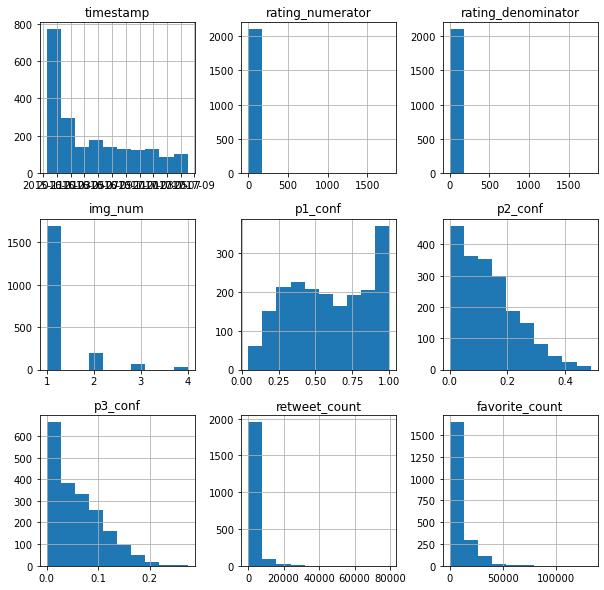

In [42]:
#lets view histogram for the dataset
df4_clean.hist(figsize=(10,10));

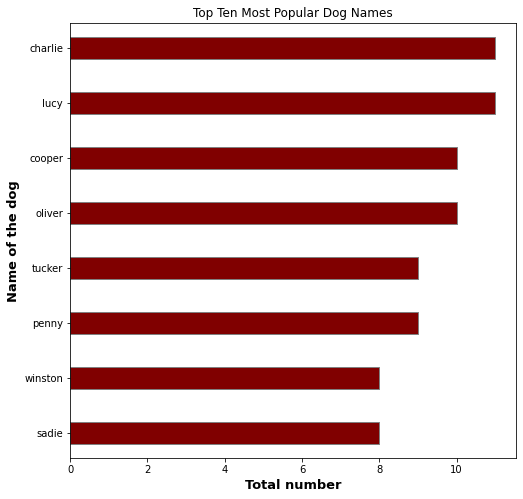

In [43]:
#Plot of popular dog names
plt.figure(figsize=(8,8))
df4_clean['name'].value_counts()[2:10].sort_values(ascending = True).plot(kind='barh',
                                                                        color = 'maroon',
                                                                        width = 0.4,
                                                                        edgecolor ='grey')
plt.xlabel('Total number',fontweight ='bold', fontsize = 13)
plt.ylabel('Name of the dog',fontweight ='bold', fontsize = 13)
plt.title('Top Ten Most Popular Dog Names');

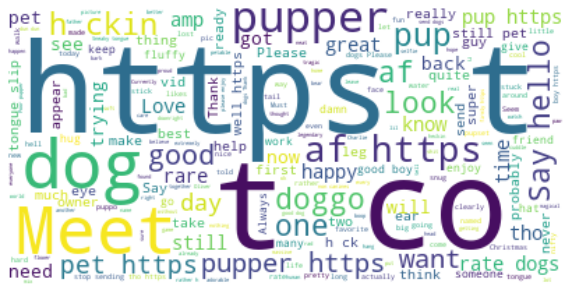

In [44]:
#let's see common words on the tweets
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize = (10, 10), facecolor = None) 

text = " ".join(i for i in df4_clean.text)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

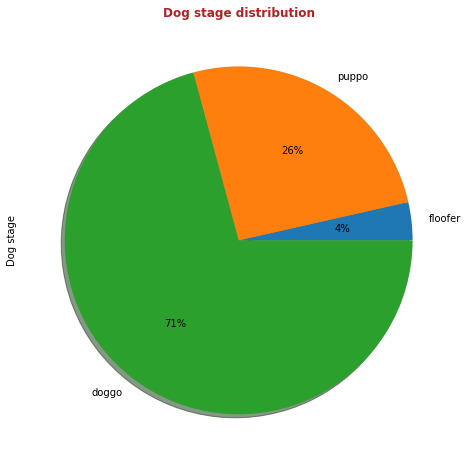

In [45]:
#Plot of popular dog types
plt.figure(figsize=(8,8))
df4_clean['dog_stage'].value_counts()[1:10].sort_values(ascending=True).plot(
    kind='pie',
    autopct ='%1.0f%%',
    shadow = True)
plt.ylabel('Dog stage')
plt.title('Dog stage distribution', fontweight = 'bold', color = 'firebrick');